## ASSIGNMENT
#### In this assignment, you continue to study the data of the US Education System. Again, please down it from here (dataset). In this dataset, there is a lot of data on an annual basis. You can reach the explanations of this data from Kaggle again.

#### First of all, apply the most appropriate one of the techniques for completing the missing values in your previous lesson. In order to answer the following questions, you must overcome the missing data.

#### 1-See TOTAL_REVENUE, which includes total revenue data, and TOTAL_EXPENDITURE, which includes total spending data. Do these variables contain outliers?


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings('ignore')
df = pd.read_csv('data/datasets_95317_1078789_states_all.csv',  low_memory=False)


In [3]:
print(df.TOTAL_REVENUE)

0        2678885.0
1        1049591.0
2        3258079.0
3        1711959.0
4       26260025.0
           ...    
1710           NaN
1711           NaN
1712           NaN
1713           NaN
1714           NaN
Name: TOTAL_REVENUE, Length: 1715, dtype: float64


In [4]:
print(df.TOTAL_REVENUE.describe())

count    1.275000e+03
mean     9.102045e+06
std      1.175962e+07
min      4.656500e+05
25%      2.189504e+06
50%      5.085826e+06
75%      1.084516e+07
max      8.921726e+07
Name: TOTAL_REVENUE, dtype: float64


1275
1715


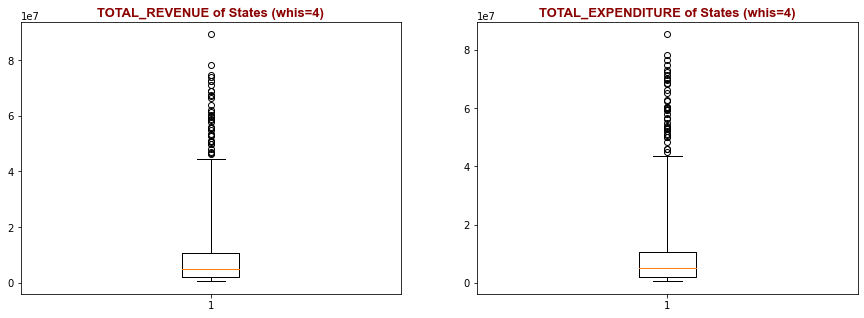

In [5]:
print(len(df['TOTAL_REVENUE'].dropna()))
print(len(df['TOTAL_REVENUE']))

title_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
axis_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }


plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.boxplot(df.TOTAL_REVENUE.dropna(),whis=4 )
plt.title("TOTAL_REVENUE of States (whis=4)", fontdict=title_font)

plt.subplot(1,2,2)
plt.boxplot(df.TOTAL_EXPENDITURE.dropna(),whis=4 )
plt.title("TOTAL_EXPENDITURE of States (whis=4)", fontdict=title_font)
plt.show()

In [6]:
from scipy.stats import zscore

z_scores = zscore(df["TOTAL_REVENUE"].dropna())
z_scores2=zscore(df["TOTAL_EXPENDITURE"].dropna())
for threshold in range(1,5):
    print('TOTAL_REVENUE')
    print("Eşik değeri (Threshold value): {}".format(threshold))
    print("Aykırı değerlerin sayısı(Number of Outliers): {}".format(len((np.where(z_scores > threshold)[0]))))
    print('------------------------------------------------------------')
    print('TOTAL_EXPENDITURE')
    print("Eşik değeri (Threshold value): {}".format(threshold))
    print("Aykırı değerlerin sayısı(Number of Outliers): {}".format(len((np.where(z_scores2 > threshold)[0]))))
    print('||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||')

TOTAL_REVENUE
Eşik değeri (Threshold value): 1
Aykırı değerlerin sayısı(Number of Outliers): 134
------------------------------------------------------------
TOTAL_EXPENDITURE
Eşik değeri (Threshold value): 1
Aykırı değerlerin sayısı(Number of Outliers): 134
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
TOTAL_REVENUE
Eşik değeri (Threshold value): 2
Aykırı değerlerin sayısı(Number of Outliers): 52
------------------------------------------------------------
TOTAL_EXPENDITURE
Eşik değeri (Threshold value): 2
Aykırı değerlerin sayısı(Number of Outliers): 53
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
TOTAL_REVENUE
Eşik değeri (Threshold value): 3
Aykırı değerlerin sayısı(Number of Outliers): 37
------------------------------------------------------------
TOTAL_EXPENDITURE
Eşik değeri (Threshold value): 3
Aykırı değerlerin sayısı(Number of Outliers): 38
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
TOTAL_REVENUE
Eşik değeri (Threshold v

 

#### 2-If you find outliers in the total income TOTAL_REVENUE and total expenditure TOTAL_EXPENDITURE variables, eliminate these outliers by applying the techniques you learned in this lesson and verify that no outliers remain after doing this.
 


In [7]:
q75, q25 = np.percentile(df["TOTAL_REVENUE"].dropna(), [75 ,25])
IQR = q75 - q25

q75_log, q25_log = np.percentile(np.log(df["TOTAL_REVENUE"].dropna()), [75 ,25])
IQR_log = q75_log - q25_log

TEq75, TEq25 = np.percentile(df["TOTAL_EXPENDITURE"].dropna(), [75 ,25])
TEIQR = TEq75 - TEq25

TEq75_log, TEq25_log = np.percentile(np.log(df["TOTAL_EXPENDITURE"].dropna()), [75 ,25])
TEIQR_log = TEq75_log - TEq25_log

log_threshold_values=[]# = pd.DataFrame(columns=['threshold_value', 'outlier_value_number', 'outlier_value_number_log'])
TElog_threshold_values=[]# = pd.DataFrame(columns=['threshold_value', 'outlier_value_number', 'outlier_value_number_log'])

for threshold_value in np.arange(1,5,0.5):
    min_value_log = q25_log - (IQR_log*threshold_value) 
    max_value_log = q75_log + (IQR_log*threshold_value)
    min_value = q25 - (IQR*threshold_value) #withoutlog transformation
    max_value = q75 + (IQR*threshold_value) #without log transformation
    
    TEmin_value_log = TEq25_log - (TEIQR_log*threshold_value) 
    TEmax_value_log = TEq75_log + (TEIQR_log*threshold_value)
    TEmin_value = TEq25 - (TEIQR*threshold_value) #withoutlog transformation
    TEmax_value = TEq75 + (TEIQR*threshold_value) #without log transformation
    
    outlier_value_number_log = len((np.where((np.log(df["TOTAL_REVENUE"].dropna()) > max_value_log)| 
                                       (np.log(df["TOTAL_REVENUE"].dropna()) < min_value_log))[0]))
    
    outlier_value_number = len((np.where((df["TOTAL_REVENUE"].dropna() > max_value)| 
                                       (df["TOTAL_REVENUE"].dropna() < min_value))[0]))
    

    
    
    TEoutlier_value_number_log = len((np.where((np.log(df["TOTAL_EXPENDITURE"].dropna()) > TEmax_value_log)| 
                                       (np.log(df["TOTAL_EXPENDITURE"].dropna()) < TEmin_value_log))[0]))
    
    TEoutlier_value_number = len((np.where((df["TOTAL_EXPENDITURE"].dropna() > TEmax_value)| 
                                       (df["TOTAL_EXPENDITURE"].dropna() < TEmin_value))[0]))
    
    log_threshold_values.append({'TOTAL_REVENUE threshold_value': threshold_value,
                                 'TOTAL_REVENUE outlier_value_number' : outlier_value_number,
                                 'TOTAL_REVENUE outlier_value_number_log': outlier_value_number_log ,
                                'TOTAL_EXPENDITURE threshold_value': threshold_value,
                                 'TOTAL_EXPENDITURE outlier_value_number' : TEoutlier_value_number,
                                 'TOTAL_EXPENDITURE outlier_value_number_log': TEoutlier_value_number_log })
    
pd.DataFrame(log_threshold_values)

,TOTAL_REVENUE threshold_value,TOTAL_REVENUE outlier_value_number,TOTAL_REVENUE outlier_value_number_log,TOTAL_EXPENDITURE threshold_value,TOTAL_EXPENDITURE outlier_value_number,TOTAL_EXPENDITURE outlier_value_number_log
0,1.0,146,25,1.0,152,28
1,1.5,110,0,1.5,111,0
2,2.0,74,0,2.0,80,0
3,2.5,52,0,2.5,55,0
4,3.0,45,0,3.0,49,0
5,3.5,41,0,3.5,43,0
6,4.0,37,0,4.0,39,0
7,4.5,32,0,4.5,35,0


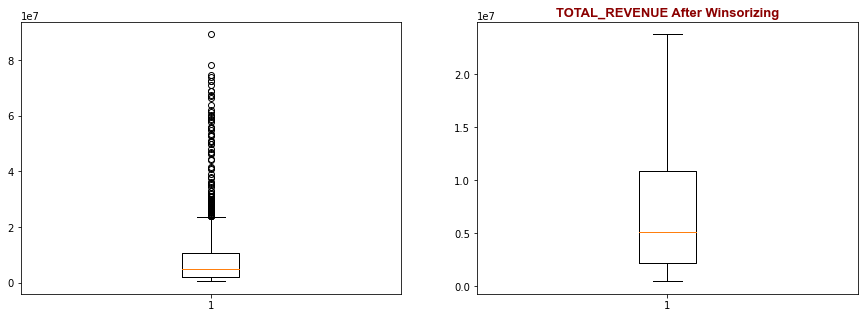

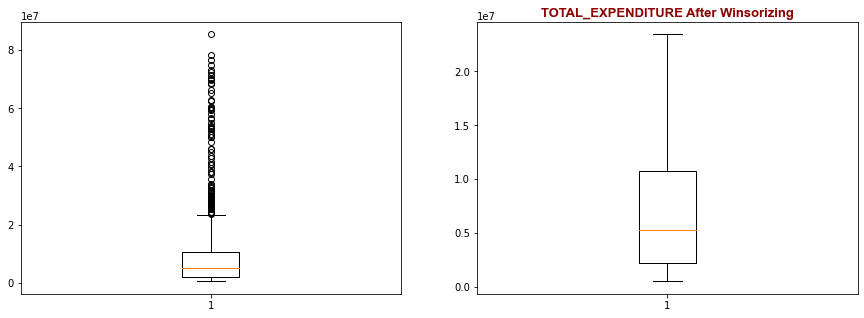

In [66]:
from scipy.stats.mstats import winsorize

winsorizing_gross= winsorize(df["TOTAL_REVENUE"].dropna(), (0, 0.0870))

winsorizing_gross2= winsorize(df["TOTAL_EXPENDITURE"].dropna(), (0, 0.0871))


baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
axis_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }


plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.boxplot(df["TOTAL_REVENUE"].dropna())



plt.subplot(1,2,2)
plt.boxplot(winsorizing_gross)
plt.title("TOTAL_REVENUE After Winsorizing", fontdict=baslik_font)

plt.figure(figsize = (15,5))


plt.subplot(1,2,1)
plt.boxplot(df["TOTAL_EXPENDITURE"].dropna())


plt.subplot(1,2,2)
plt.boxplot(winsorizing_gross2)
plt.title("TOTAL_EXPENDITURE After Winsorizing", fontdict=baslik_font)
plt.show()

#### 3-Subtract the total expenditure TOTAL_EXPENDITURE from the total income variable TOTAL_REVENUE to create a variable that can be considered as a budget deficit (without failing to contradict the outliers). Are there any outliers in this new variable? If any, clear these outliers.
 



In [9]:
subtract=df["TOTAL_REVENUE"] - df["TOTAL_EXPENDITURE"]
df["SUBTRACT"]=subtract
df[["TOTAL_REVENUE","TOTAL_EXPENDITURE","SUBTRACT"]].head()


,TOTAL_REVENUE,TOTAL_EXPENDITURE,SUBTRACT
0,2678885.0,2653798.0,25087.0
1,1049591.0,972488.0,77103.0
2,3258079.0,3401580.0,-143501.0
3,1711959.0,1743022.0,-31063.0
4,26260025.0,27138832.0,-878807.0


In [10]:
len(df["SUBTRACT"][df["SUBTRACT"]<0]) #sum of negative results

744

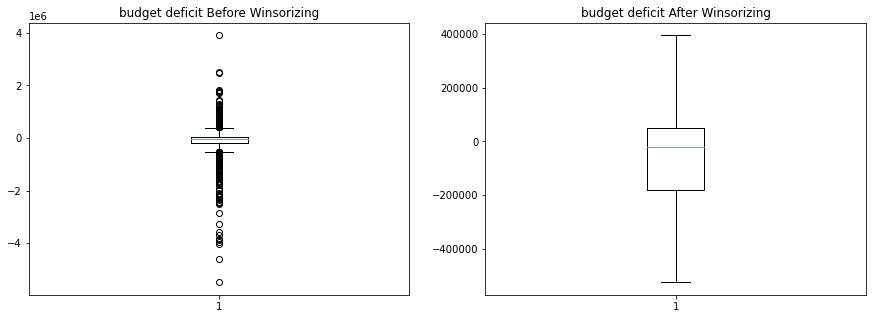

1275

In [184]:

plt.figure(figsize = (15,5))

plt.subplot(1,2,1)

plt.boxplot(df["SUBTRACT"].dropna())
plt.title("budget deficit Before Winsorizing")
plt.subplot(1,2,2)
winsorizing= winsorize(df["SUBTRACT"].dropna(), (0.0895, 0.0667))
plt.boxplot(winsorizing)
plt.title("budget deficit After Winsorizing")
plt.show()

len(winsorizing)

In [132]:
subtract=df["TOTAL_REVENUE"] - df["TOTAL_EXPENDITURE"]
df["SUBTRACT"]=subtract
df[["TOTAL_REVENUE","TOTAL_EXPENDITURE","SUBTRACT"]].head()


,TOTAL_REVENUE,TOTAL_EXPENDITURE,SUBTRACT
0,2678885.0,2653798.0,25087.0
1,1049591.0,972488.0,77103.0
2,3258079.0,3401580.0,-143501.0
3,1711959.0,1743022.0,-31063.0
4,26260025.0,27138832.0,-878807.0


#### 4-Again create a variable that can be considered as a budget deficit by subtracting the total income TOTAL_REVENUE variable from the total expenditure TOTAL_EXPENDITURE. But this time, after clearing the outliers, do this. Are there any outliers in this new variable? It is useful to clean them, if any.

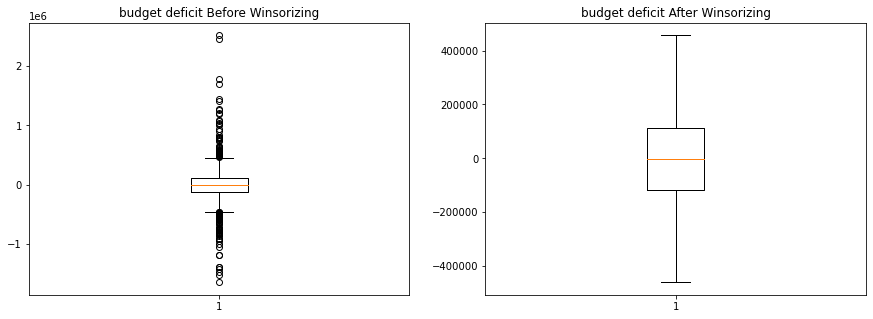

In [191]:

new_winsorizing=winsorizing_gross-winsorizing_gross2

df2=df[df["TOTAL_REVENUE"].notnull()]
df2["NEWSUBTRACT"]=new_winsorizing

plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.boxplot(df2["NEWSUBTRACT"].dropna())
plt.title("budget deficit Before Winsorizing")

plt.subplot(1,2,2)
winsorizing_gross3= winsorize(df2["NEWSUBTRACT"], (0.0557, 0.04))
plt.boxplot(winsorizing_gross3)
plt.title("budget deficit After Winsorizing")
plt.show()




#### 5-Now, we have two different budget variables that we have created in the third and fourth questions. Do you see the difference between these two?

In [12]:
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,SUBTRACT
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN,25087.0
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN,77103.0
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN,-143501.0
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN,-31063.0
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN,-878807.0


#### 6-If the budget deficit was a very important variable for us, which method would be better to clear out contrary values. Is it the method you applied in the third question or the method in the fourth question?



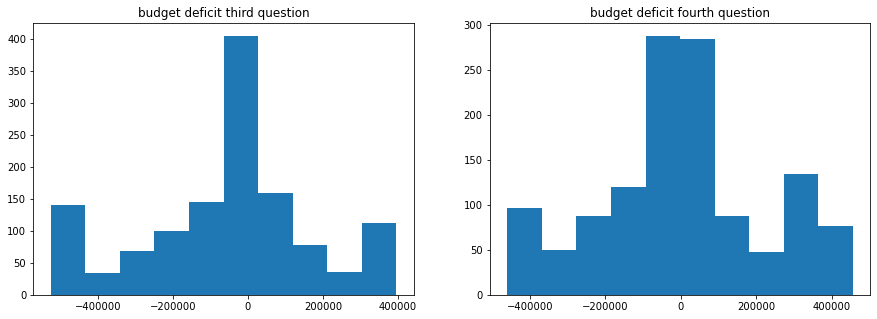

In [190]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.title("budget deficit third question")
plt.hist(winsorizing)

plt.subplot(1,2,2)
plt.title("budget deficit fourth question")
plt.hist(winsorizing_gross3)
plt.show()